# Understanding Linear Regression

Before understanding what's linear regression, let us first learn about some key terms that will be used extensively in the further activity.

1. Target: It is the feature that we want to predict.
2. Error: It is the difference between the actual and the predicted value. It is also referred to as a Residual.
3. Cost Function: It defines the total error of the model. It is this function that the model tries to optimize. In the case of Linear Regressionm, it is the mean of the sum of all the errors in the dataset, popularly known as the **mean squared error**.
4. Gradient Descent: It tries to find the best set of coefficients which optimizes the Cost Function.

---

Now, talking about Linear Regression, it tries to fit a straight line between variables which optimizes the cost function or which explains the maximum variance of the target.

The Equation of the straight line is **y = mx+c** where m is the slope of **x** and **c** is the intercept. This equation follows only when we have one independant feature. As the feature increases, the number of x's increases and the number of slopes increases.

Whole process of Linear Regression can be summarized as:
1. Randomly initialise the slopes/coefficients.
2. Use Gradient Descent

>Calculate Cost<br>
>Calculate the slope of the cost function.<br>
>Move in the direction of decreasing cost function by calculating the derivative.<br>
Update the parameters.<br>
Repeat the above steps untill the minimum value of cost function is not found.

This was just a quick recap of what a Linear Regression does. If you want to have a detailed study about this algorithm, I have added links to youtube videos under the **Additional Material** at the last of the activity. So, you can have a look to that as well.

For now, enough of theory. Let's begin with implementing Linear Regression and see what it can do.

---

## Importing Libraries

We start by importing some libraries which will be required in the future.

In [14]:
import pandas as pd #to handle the dataset
import matplotlib.pyplot as plt #to draw plots
import seaborn as sns #custom library to plot more visually appealing plots
sns.set()

## Loading the Data

In [15]:
data = pd.read_csv('data/data_cleaned.csv') #read the csv
data.head() #look at top 5 rows of the dataset

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,price
0,3.0,1.50,1340,7912,1.5,3,313000.0
1,5.0,2.50,3650,9050,2.0,5,2384000.0
2,3.0,2.00,1930,11947,1.0,4,342000.0
3,3.0,2.25,2000,8030,1.0,4,420000.0
4,4.0,2.50,1940,10500,1.0,4,550000.0


Here, we have to predict the price of a house based on other features. Hence, price will be our target or dependant feature. Whereas others will be the independant features.

In [4]:
#lets us have a look at the data
data.shape

(4600, 7)

We can see that out data has **4600 records and 7 columns**

## Data Analysis

Data Analysis is usually done before hand to see if there is anything in the data which can affect the performance of the model.

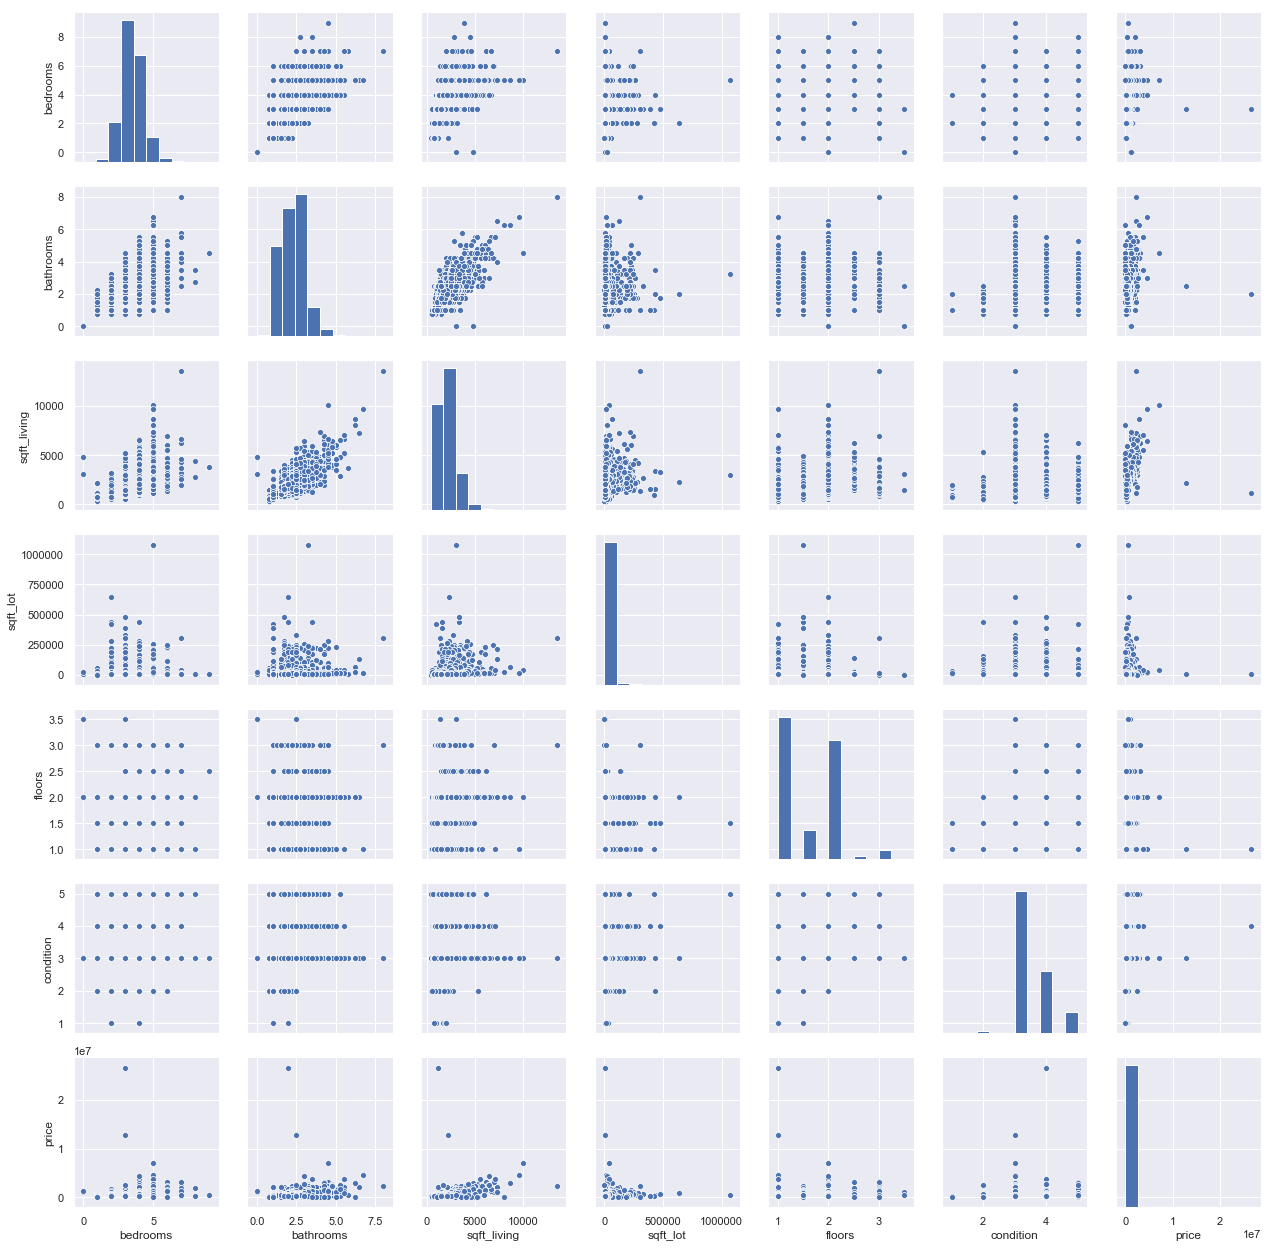

In [13]:
#a pairplot plots all the pairs of features that are present in the data.
#this way we can have a more compact and broader view of the data.
sns.pairplot(data)

There are some conclusions that can be drawn from above pairplot. These are:
1. In the last row, we can see 2-3 points that are unusually higher than the rest of the data. These are typically known as **outliers**. But for the sake of simplicity, we will not dive into its details.
2. We can see a linear relationship between sqft_living and bathrooms which seems logical.

## Train and Test Splits

Now, we will divide our data into train and test splits. We will train our model on the train dataset and then test our model's performance on the test dataset.But first, let us seperate our dependand variable with the rest of independant variable.

In [5]:
X = data.drop('price', axis = 1) #independant features
y = data.price #dependant features

Now, split them into training and test datasets in the ratio of 8:2 using **train_test_split** function.

In [6]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state= 42, shuffle= True)

print("X_train: ", X_train.shape)
print('y_train: ', y_train.shape)
print('X_test: ', X_test.shape)
print('y_test: ', y_test.shape)

X_train:  (3680, 6)
y_train:  (3680,)
X_test:  (920, 6)
y_test:  (920,)


## Fitting a Model

In [7]:
from sklearn.linear_model import LinearRegression #import the model

model = LinearRegression() #instantiate the model

model.fit(X_train, y_train) #fit the model to the training data

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

## Evaluate a model

Now, evaluate the model using the actual values and the predicted values.

In [8]:
from sklearn.metrics import mean_squared_error #import the evaluation metric

train_error = mean_squared_error(y_train, model.predict(X_train)) #calculate error on training data
test_error = mean_squared_error(y_test, model.predict(X_test)) #calculate error on testing data

print('Training Error: ', train_error)
print('Testing Error: ', test_error)

Training Error:  72389490204.53734
Testing Error:  988418836231.0701


## Make Predictions

In [ ]:
bedrooms = int(input("Bedrooms: "))
bathrooms = float(input('Bathrooms: '))
sqft_living = float(input('sqft_living: '))
sqft_lot = float(input('sqft_lot: '))
floors = float(input('Floors: '))
condition = int(input('Condition: '))

predicted_price = model.predict([[bedrooms, bathrooms, sqft_living, sqft_lot, floors, condition]])

print("Expected Price: ", predicted_price)

Bedrooms: 3
Bathrooms: 2
sqft_living: 1735
sqft_lot: 8246


**Congratulations!!! You have just completed your first activity and are now ready to dive deeper into the concepts of regression.**
But, before moving on, have a look at the resources in the next section to have a more solid understanding of the theoretical concepts behind Linear Regression.

## Additional Resources

1. https://www.youtube.com/watch?v=nk2CQITm_eo&list=PLblh5JKOoLUICTaGLRoHQDuF_7q2GfuJF&index=9